<a href="https://colab.research.google.com/github/kellissonlima/proc-sinais-20212/blob/main/Kellisson_Kayon%C3%A1rio_de_Lima_Lista_2_An%C3%A1lise_Espectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Espectral

Foi coletado aproximadamente 180 trials de um experimento motor onde ratos saudáveis iniciam um movimento de marcha. Esses trials foram coletados em um equipamento com taxa de amostragem de 1000hz e possuem comprimento de 2000 pontos (2s), onde o ponto 1000 (1s) marca o início da marcha. Três regiões foram registradas: M1, CPu e S1FL.

O arquivo está no formato pickle, que é um formato muito usado para salvar variáveis do python em um arquivo. O código para carregar o dado está na célula abaixo. Quando o dado for carregado, os trials vai estar em um np.array dentro de um dicionário, onde as chaves são as regiões.

In [3]:
import pickle
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
from numpy.fft import fft, rfft
from scipy import signal
import math
import scipy.fftpack
from scipy.signal import welch

In [4]:
drive.mount('/content/drive/')

file = open('drive/MyDrive/dados.pkl', 'rb')

data = pickle.load(file)

Mounted at /content/drive/


In [ ]:
data

1. Crie um vetor para representar o tempo, iniciando com 0 até 2 com 2000 pontos no total.

In [7]:
print(data['CPu'].shape)
# print(len(data['M1']))
# print(len(data['S1FL']))
# print(data['CPu'])

(181, 2000)


In [8]:
#Vetor para representar o tempo
srate = 1000
time  = np.arange(0, 2, 1/srate) 

In [7]:
data['M1']
# np2 = len(data['CPu'])
# np2 = len(data['S1FL'])




array([[ 0.43982378,  0.32665424,  0.33645925, ..., -0.20478602,
        -0.4132279 , -0.6725217 ],
       [ 0.23326055,  0.14288675,  0.12931123, ..., -0.44227922,
        -0.44712242, -0.40281784],
       [ 0.20559761,  0.12542436,  0.08699248, ...,  0.44418665,
         0.27176227, -0.01448212],
       ...,
       [-0.17842842, -0.70123286, -1.0533925 , ...,  0.20310741,
        -0.29991012, -0.62633183],
       [ 0.0987401 ,  0.27850571,  0.77618571, ...,  0.03946535,
         0.05860544,  0.21197415],
       [ 1.18246524,  0.82555506,  0.54742991, ..., -0.10811765,
        -0.10599643, -0.1845894 ]])

2. Crie um gráfico para o trial médio de cada região. Use o vetor de tempo como eixo x.

In [23]:
# print(data['CPu'].shape)
# # print(len(data['M1']))
# # print(len(data['S1FL'])

#print(data['CPu'].mean(0))
trialMedioCPu = np.mean(data['CPu'],0)
trialMedioM1 = np.mean(data['M1'],0)
trialMedioS1FL = np.mean(data['S1FL'],0)


Text(0.5, 1.0, 'Dominío do Tempo [Trial Médio CPu]')

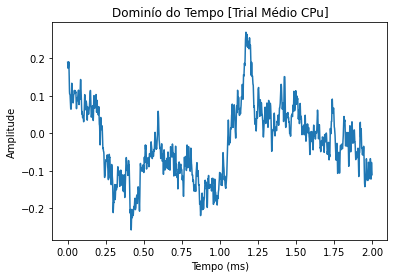

In [41]:
# srate = 1000
# time  = np.arange(0,2,1/srate)
npnts = len(time)

#medCPu = trialMedioCPu / npnts #estou com dúvidas se é para dividir pelo número de pontos
hz = np.linspace(0, srate/2, int(np.floor(len(time)/2)+1))

plt.plot(time,trialMedioCPu) #fiz a plotagem sem a divisão pelo o número de pontos não é tão diferente.
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.title('Dominío do Tempo [Trial Médio CPu]')


Text(0.5, 1.0, 'Dominío do Tempo [Trial Médio M1]')

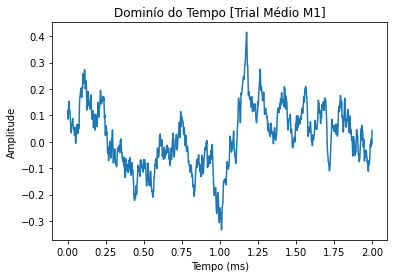

In [42]:
#medM1 = trialMedioM1 / npnts
hz = np.linspace(0, srate/2, int(np.floor(len(time)/2)+1))

plt.plot(time,trialMedioM1)
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.title('Dominío do Tempo [Trial Médio M1]')

Text(0.5, 1.0, 'Dominío do Tempo [Trial Médio S1FL]')

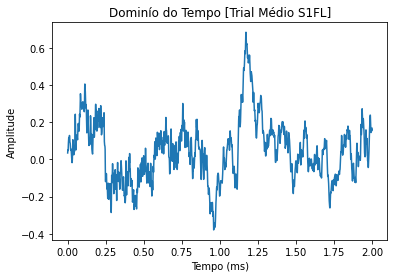

In [43]:
#medS1FL = trialMedioS1FL / npnts
hz = np.linspace(0, srate/2, int(np.floor(len(time)/2)+1))

plt.plot(time,trialMedioS1FL)
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.title('Dominío do Tempo [Trial Médio S1FL]')

3. Calcule o espectrograma médio para cada região. O que você pode concluir desses gráficos? Limite o eixo das frequências para exibir apenas até 40hz.


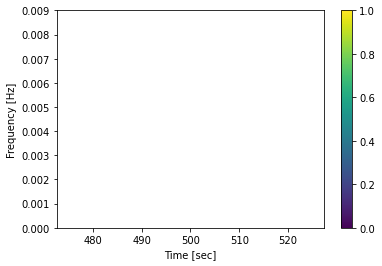

In [49]:
signalXCPu = scipy.fftpack.fft(trialMedioCPu)/npnts #transformada de fourrier mais normalização
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

signalXCPuAmp = np.abs(signalXCPu[0:len(hz)]) #aplicando a normalização
signalXCPuAmp[1:] = 2*signalXCPuAmp[1:] #aplicando a normalização

f, t, Sxx = scipy.signal.spectrogram(signalXCPuAmp, fs = 1, nperseg=1000)

plt.pcolormesh(t, f[0:10], Sxx[0:10, :], shading='flat', vmax=1000)

plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()

ValueError: ignored

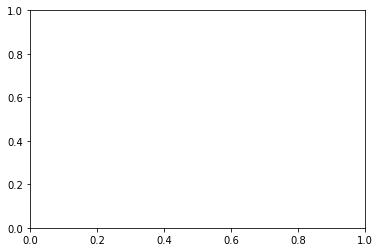

In [21]:
plt.plot(f,10*np.log10(Pxx_den))

plt.xlim([0,160])

In [19]:
print('Cpu Antes: ', data['CPu'][:,:1000])
print('Cpu Depois: ',data['CPu'][:,1000:])

Cpu Antes:  [[-1.43583934 -1.32436542 -1.17747347 ... -0.82340922 -0.99788727
  -1.22186906]
 [-1.40954468 -1.32718109 -1.0216144  ...  0.6316025   0.89248521
   0.95059114]
 [ 1.35225175  1.1145167   0.87483198 ... -0.00730364 -0.32835145
  -0.47492357]
 ...
 [-0.29165917 -0.35536032 -0.37534952 ... -0.43132732 -0.36540864
  -0.2271383 ]
 [ 0.35302539  0.27383921  0.23156333 ... -0.01822476  0.19454621
   0.17772105]
 [-0.02101612  0.08857847  0.21528353 ...  0.50359634  0.49038068
   0.58314497]]
Cpu Depois:  [[-1.18138069 -0.79599723 -0.25912028 ... -0.11286907 -0.08095779
  -0.17176795]
 [ 0.73861197  0.55895388  0.76050461 ... -0.34164288 -0.14403572
   0.05494349]
 [-0.55399353 -0.64687485 -0.71565587 ...  0.64993926  0.66775617
   0.60153265]
 ...
 [-0.21110379 -0.2376563  -0.28376346 ... -0.62695781 -0.78253128
  -0.78412068]
 [-0.03036642 -0.2149384  -0.23510367 ... -0.23762375 -0.26859969
  -0.27623155]
 [ 0.78184555  0.93201448  0.91883629 ...  0.05704207  0.03860252
  -0.09

Calule o espectro para cada trial, antes e depois do movimento e para cada região.


Crie o gráfico de barras plotando e média e o desvio padrão do espectro para as bandas: 0-4hz, 4-8hz, 8-12hz e 12-30hz. Qual região e banda teve diferença entre o espectro de antes e depois do movimento?


# Nova seção

# Perguntas
Responda as perguntas abaixo:

1. Crie um vetor para representar o tempo, iniciando com 0 até 2 com 2000 pontos no total.
2. Crie um gráfico para o trial médio de cada região. Use o vetor de tempo como eixo x.
3. Calcule o espectrograma médio para cada região. O que você pode concluir desses gráficos? Limite o eixo das frequências para exibir apenas até 40hz.
4. Calule o espectro para cada trial, antes e depois do movimento e para cada região.
5. Crie o gráfico de barras plotando e média e o desvio padrão do espectro para as bandas: 0-4hz, 4-8hz, 8-12hz e 12-30hz. Qual região e banda teve diferença entre o espectro de antes e depois do movimento?